<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Stock-Market-and-News-Analysis/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR:- KSHITEZ PRATAP SINGH**

# **Stock Market Prediction using Numerical and Textual Analysis**

### **Description**  
A stock market is a public market where you can buy and sell shares for publicly listed companies. The stocks, also known as equities, represent ownership in the company. The stock exchange is the mediator that allows the buying and selling of shares.

Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange. The entire idea of predicting stock prices is to gain significant profits. Predicting how the stock market will perform is a hard task to do. There are other factors involved in the prediction, such as physical and psychological factors, rational and irrational behavior, and so on. All these factors combine to make share prices dynamic and volatile. This makes it very difficult to predict stock prices with high accuracy.
![picture](https://drive.google.com/uc?export=view&id=1OK9gWERwiStqt79ZNfR29d7TMYuSYt9D)

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
path='drive/My Drive/Dataset'

### **Importing the Essential Libraries**

In [70]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [71]:
!pip install pmdarima

## **PART A : Numerical Data Set Analysis**


### **Time Series Analysis**

In [72]:
df_1=pd.read_csv(path+"/stock.csv")
df_1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


### **Exploring Dataset**

In [73]:
a,b=df_1.shape
print('Number of Rows:    ',a)
print('Number of Columns: ',b)

Number of Rows:     252
Number of Columns:  7


In [74]:
df_1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [75]:
df_1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,37804.237375,38071.182859,37422.826992,37745.454117,37745.454117,19134.000000
std,4507.985769,4380.974060,4647.212947,4535.304336,4535.304336,16540.261333
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34369.659179,34779.932618,33975.389648,34257.097656,34257.097656,13125.000000
50%,38489.480469,38750.359375,38234.869140,38425.974610,38425.974610,17000.000000
75%,41179.222656,41376.482422,41023.923828,41135.233399,41135.233399,21075.000000
max,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,188300.000000


In [76]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


### **Converting Date column to datetime datatype**

In [77]:
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


### **Null Values in the Dataset**

In [78]:
df_1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [79]:
df_1.dropna(inplace = True)

### **Visualising**

Text(0, 0.5, 'Close')

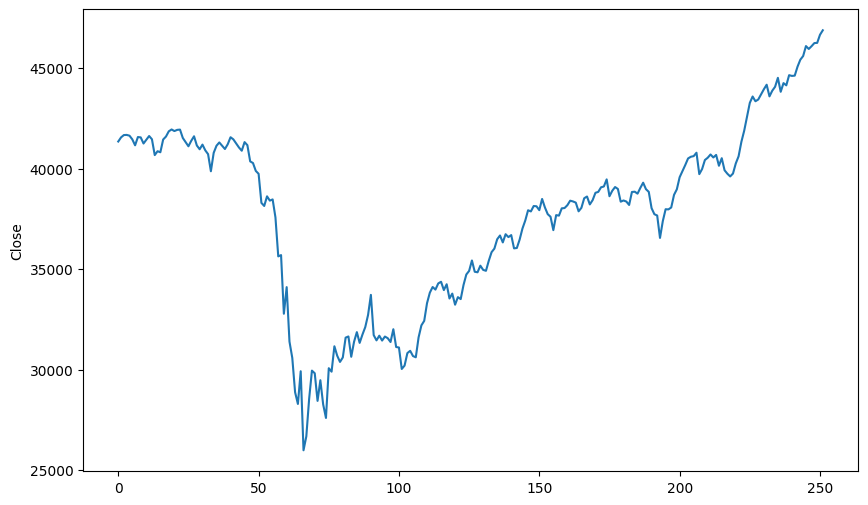

In [80]:
plt.figure(figsize=(10, 6))
df_1['Close'].plot()
plt.ylabel('Close')

### **Plotting moving average**

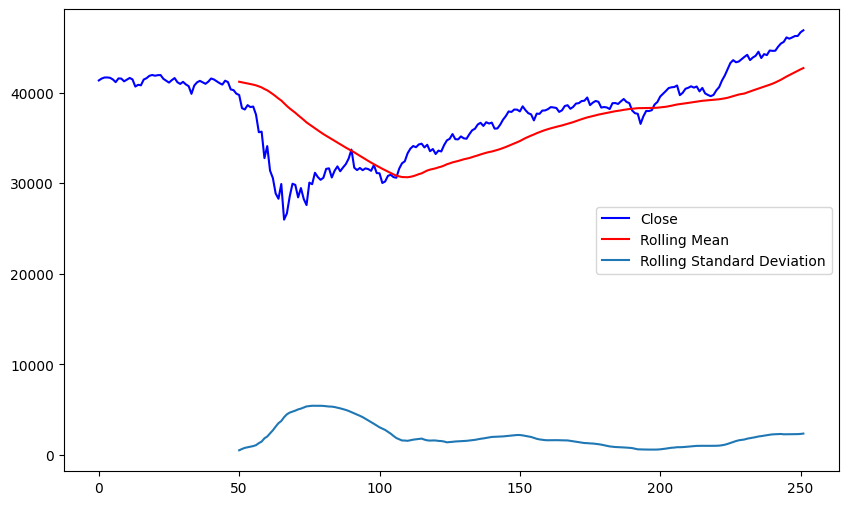

In [81]:
close = df_1['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_1['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

### **Plotting Returns**

Text(0.5, 1.0, 'Returns')

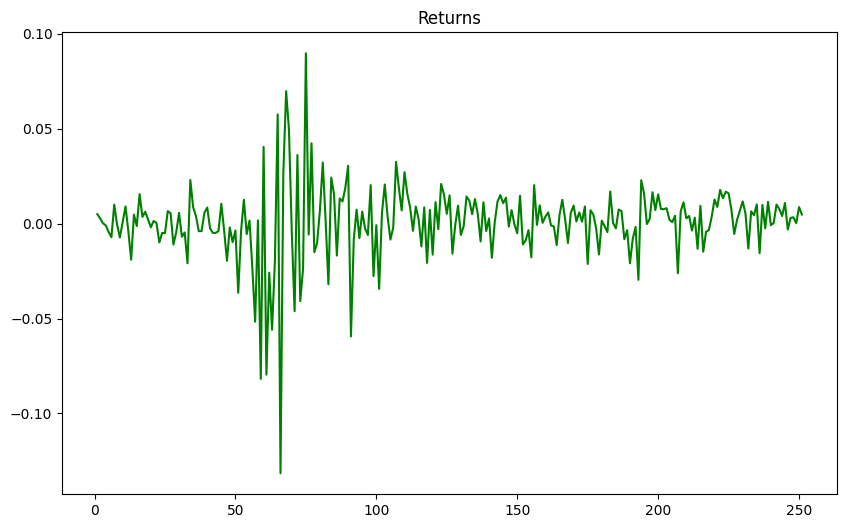

In [82]:
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

### **Train Text Split**

In [83]:
train = df_1[:150]
test = df_1[150:]

In [84]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
151,2020-07-28,38052.179688,38554.718750,37998.128906,38492.949219,38492.949219,15500.0
152,2020-07-29,38427.148438,38617.031250,37884.410156,38071.128906,38071.128906,17600.0
153,2020-07-30,38262.828125,38413.808594,37678.421875,37736.070313,37736.070313,14800.0
154,2020-07-31,37847.878906,37897.781250,37431.679688,37606.890625,37606.890625,20200.0
155,2020-08-03,37595.730469,37596.019531,36911.230469,36939.601563,36939.601563,14300.0
...,...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0


### **Stationary Test**

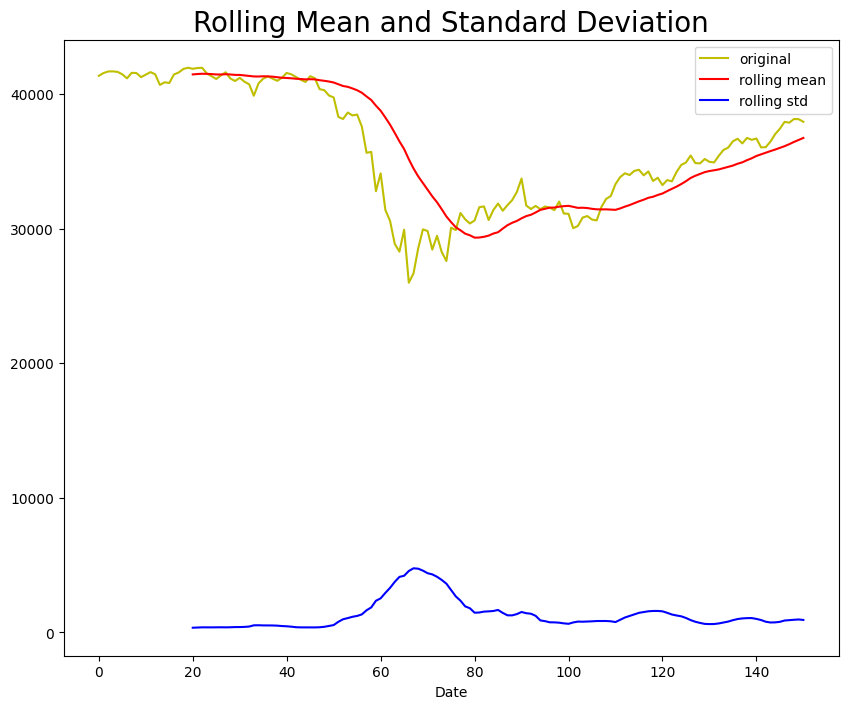

Results of dickey fuller test
ADF Test Statistic : -1.687166013251829
p-value : 0.4377367682104692
#Lags Used : 7
Number of Observations Used : 142
Weak evidence against null hypothesis, time series is non-stationary 


In [85]:
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)

 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

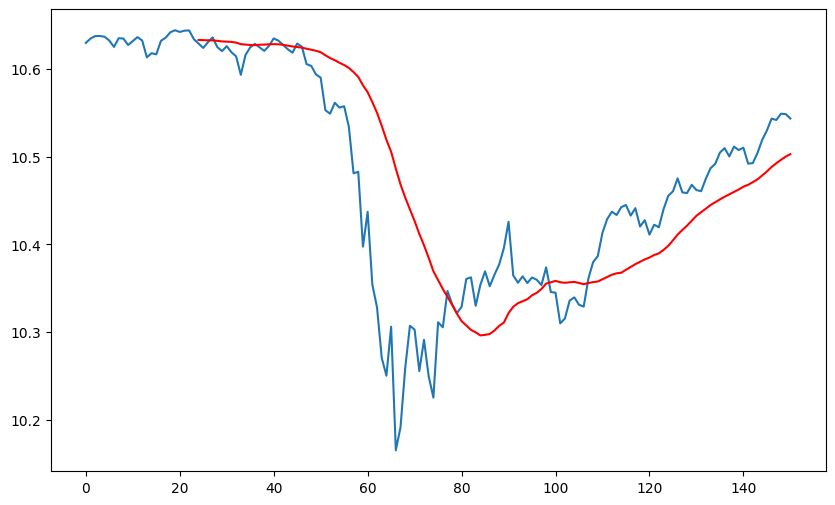

In [86]:
train_log = np.log(train['Close'])
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean()
plt.figure(figsize = (10,6))
plt.plot(train_log)
plt.plot(mav, color = 'red')

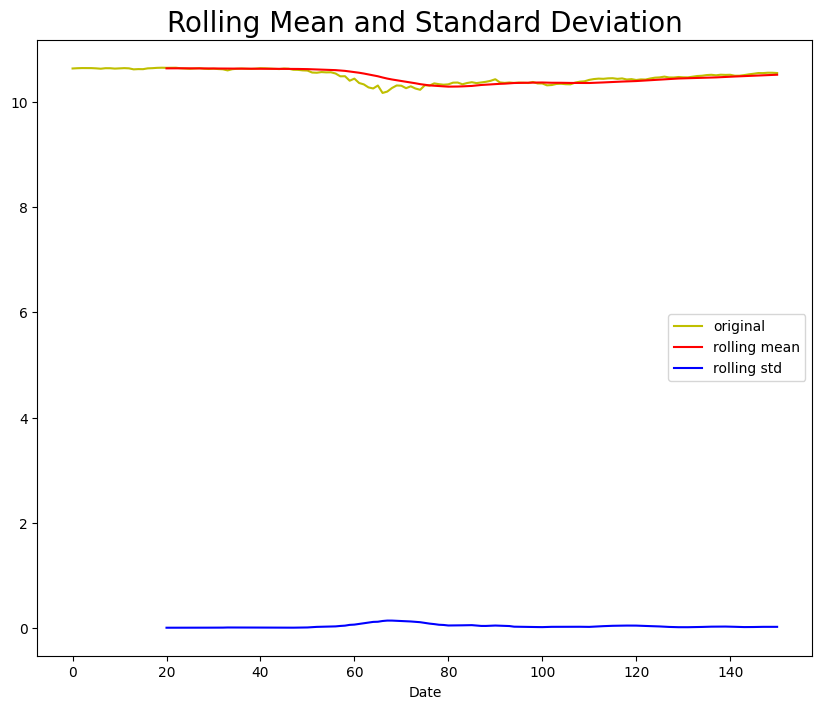

Results of dickey fuller test
ADF Test Statistic : -1.7286161148493542
p-value : 0.4164321562041457
#Lags Used : 7
Number of Observations Used : 142
Weak evidence against null hypothesis, time series is non-stationary 


In [87]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

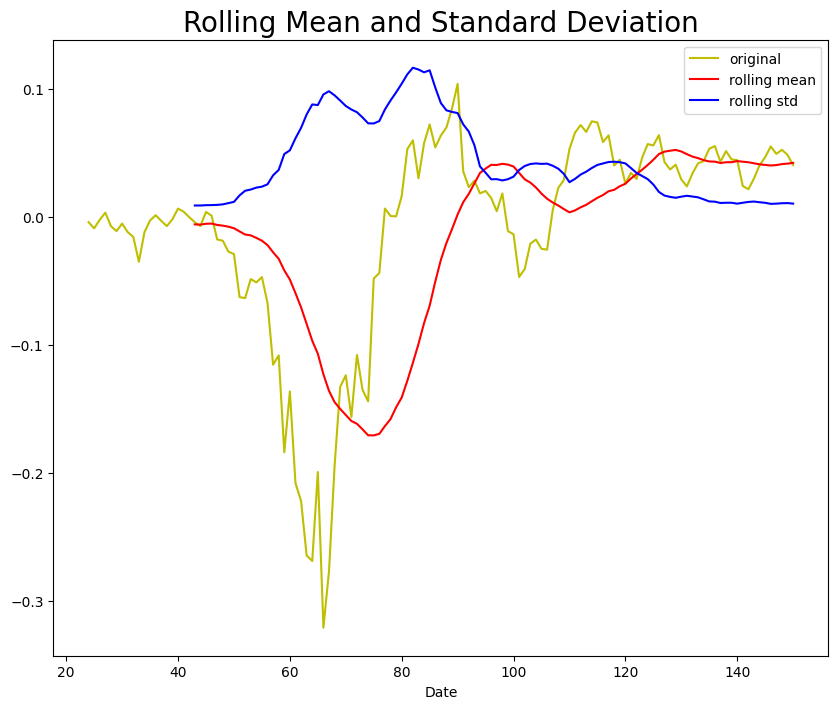

Results of dickey fuller test
ADF Test Statistic : -2.341094258604554
p-value : 0.15905646307623206
#Lags Used : 7
Number of Observations Used : 119
Weak evidence against null hypothesis, time series is non-stationary 


In [88]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

### **Using auto arima to make predictions using log data**

In [89]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-670.592, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-672.829, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-674.588, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-674.206, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-674.749, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-672.661, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.718 seconds


Text(0, 0.5, 'Actual Stock Price')

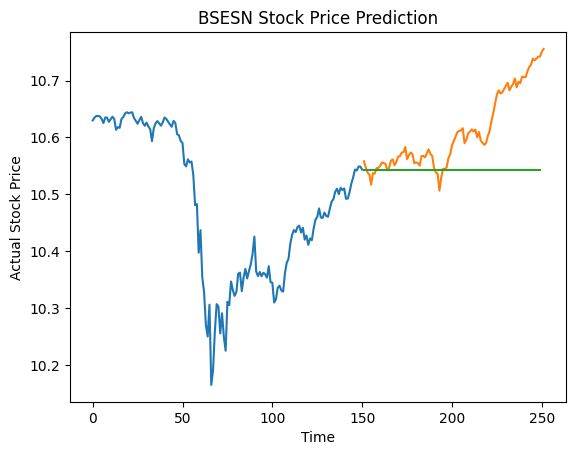

In [90]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

## **PART B : News Data Set Analysis**


### **Textual Analysis**

In [91]:
cols = ['Date','Category','News']
df_2 = pd.read_csv(path+'/india-news-headlines.csv', names = cols)
df_2

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


### **Dropping Unwanted Columns**

In [92]:
df_2.drop(0, inplace=True)
df_2.drop('Category', axis = 1, inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 55.7+ MB


### **Converting data type of Date column**

In [93]:
 df_2['Date'] = pd.to_datetime(df_2['Date'],format= '%Y%m%d')
 df_2

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650966,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650967,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650969,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


### **Grouping the headlines for each day**

In [94]:
df_2['News'] = df_2.groupby(['Date']).transform(lambda x : ' '.join(x))
df_2 = df_2.drop_duplicates()
df_2.reset_index(inplace = True, drop = True)
df_2

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


### **Cleaning headlines**

In [95]:
df_2.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df_2["News"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

### **Subjectivity and Polarity**

In [96]:
def Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def Polarity(text):
  return  TextBlob(text).sentiment.polarity

df_2['Subjectivity'] = df_2['News'].apply(Subjectivity)
df_2['Polarity'] = df_2['News'].apply(Polarity)
df_2


,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954


### **Visualisation**

<Axes: >

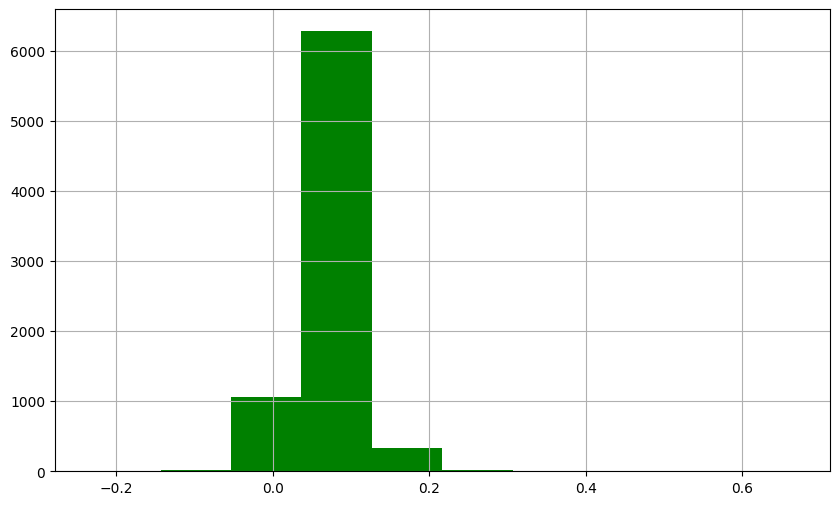

In [97]:
plt.figure(figsize = (10,6))
df_2['Polarity'].hist(color = 'green')

<Axes: >

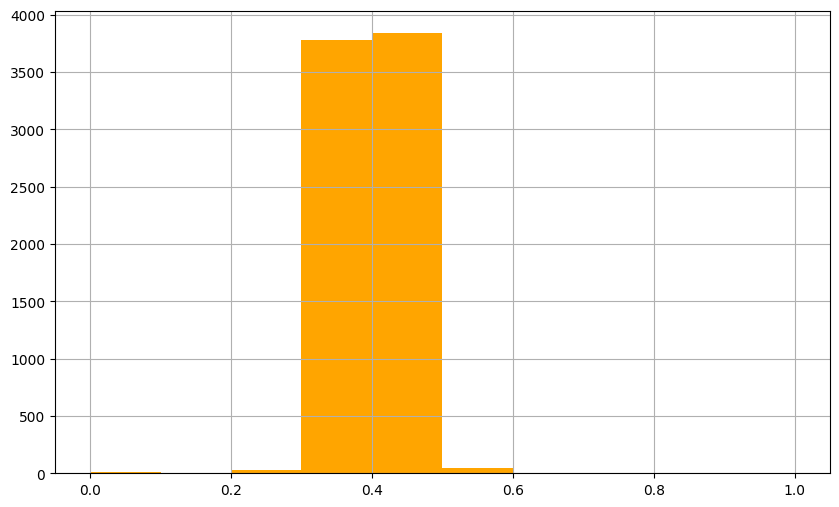

In [98]:
plt.figure(figsize = (10,6))
df_2['Subjectivity'].hist(color = 'orange')

### **Adding sentiment score to df_2**

In [99]:
sia = SentimentIntensityAnalyzer()

df_2['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_2['News']]
df_2['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_2['News']]
df_2['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_2['News']]
df_2['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_2['News']]
df_2

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162,-0.9999,0.158,0.758,0.084
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.9999,0.160,0.737,0.103
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,-0.9999,0.159,0.755,0.086
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954,-0.9999,0.156,0.769,0.076


## **PART C : Combined Dataset**

In [100]:
df_merge = pd.merge(df_1, df_2, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,After Jagannath Temple Puri beach devpt plan ...,0.356256,0.037977,-1.0000,0.206,0.715,0.079
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,What is Citizenship Amendment Bill All...,0.396291,0.039680,-0.9999,0.164,0.754,0.082
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,Only of CCA covered after revamp of canals...,0.371783,0.029115,-0.9998,0.135,0.797,0.068
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,I'm done playing the good girl I want to be a...,0.366210,0.047456,-0.9999,0.179,0.733,0.088
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,Weekly Horoscope December Check predic...,0.393635,0.036077,-0.9999,0.157,0.753,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0,Ways to get you in the mood for sex when you'r...,0.374037,0.052291,-0.9999,0.168,0.743,0.089
246,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0,No threat from Covid claims to balance sheets ...,0.382335,0.072333,-0.9996,0.128,0.776,0.095
247,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0,RT PCR tests in a day only found ve ...,0.368751,0.039336,-0.9999,0.145,0.767,0.089
248,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0,Asmita Sood's favourite holiday destinations a...,0.427681,0.067088,-0.9997,0.124,0.793,0.083


In [101]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,41352.171875,0.356256,0.037977,-1.0000,0.206,0.715,0.079
1,41558.570313,0.396291,0.039680,-0.9999,0.164,0.754,0.082
2,41673.921875,0.371783,0.029115,-0.9998,0.135,0.797,0.068
3,41681.539063,0.366210,0.047456,-0.9999,0.179,0.733,0.088
4,41642.660156,0.393635,0.036077,-0.9999,0.157,0.753,0.091
...,...,...,...,...,...,...,...
245,46099.011719,0.374037,0.052291,-0.9999,0.168,0.743,0.089
246,46253.460938,0.382335,0.072333,-0.9996,0.128,0.776,0.095
247,46263.171875,0.368751,0.039336,-0.9999,0.145,0.767,0.089
248,46666.460938,0.427681,0.067088,-0.9997,0.124,0.793,0.083


### **Data Standardisation**

In [102]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.735131,0.157604,0.254831,0.00000,0.913386,0.044118,0.296296
1,0.745002,0.537627,0.270044,0.00005,0.582677,0.330882,0.333333
2,0.750519,0.304990,0.175669,0.00010,0.354331,0.647059,0.160494
3,0.750884,0.252084,0.339500,0.00005,0.700787,0.176471,0.407407
4,0.749024,0.512408,0.237860,0.00005,0.527559,0.323529,0.444444


### **Dependent and Independent Columns**

In [103]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [106]:
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.157604,0.254831,0.000000,0.913386,0.044118,0.296296
1,0.537627,0.270044,0.000050,0.582677,0.330882,0.333333
2,0.304990,0.175669,0.000100,0.354331,0.647059,0.160494
3,0.252084,0.339500,0.000050,0.700787,0.176471,0.407407
4,0.512408,0.237860,0.000050,0.527559,0.323529,0.444444
...,...,...,...,...,...,...
245,0.326385,0.382691,0.000050,0.614173,0.250000,0.419753
246,0.405146,0.561721,0.000201,0.299213,0.492647,0.493827
247,0.276208,0.266972,0.000050,0.433071,0.426471,0.419753
248,0.835584,0.514876,0.000151,0.267717,0.617647,0.345679


In [107]:
y

0      0.735131
1      0.745002
2      0.750519
3      0.750884
4      0.749024
         ...   
245    0.962154
246    0.969541
247    0.970005
248    0.989293
249    1.000000
Name: Close, Length: 250, dtype: float64

### **Splitting the Dataset**

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(200, 6)

In [110]:
x_test

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
225,0.369711,0.669623,1.000000,0.338583,0.161765,1.000000
122,0.651811,0.471288,0.000100,0.393701,0.470588,0.395062
92,0.404859,0.391111,0.000352,0.173228,0.742647,0.296296
157,0.298198,0.562471,0.000151,0.488189,0.161765,0.765432
154,0.709902,0.619731,0.000100,0.480315,0.220588,0.679012
161,0.465301,0.454071,0.000100,0.338583,0.610294,0.246914
198,0.364780,0.416193,0.000251,0.157480,0.852941,0.123457
83,0.694318,0.603613,0.000100,0.448819,0.382353,0.456790
63,0.237980,0.310904,0.000000,0.582677,0.514706,0.024691
155,0.553857,0.419600,0.000201,0.314961,0.492647,0.481481


### **Model 1 : Random Forest**

In [111]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [112]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.53255957 0.45165833 0.55932105 0.57660888 0.48201825 0.37556528
 0.52073483 0.52420297 0.42673939 0.5106767 ]
225    0.842333
122    0.393456
92     0.272824
157    0.576027
154    0.524095
161    0.592488
198    0.621378
83     0.258180
63     0.110334
155    0.559884
Name: Close, dtype: float64
0.034260106844383915


### **Model 2 : Ada Boost Regressor**

In [113]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [114]:
print(mean_squared_error(predictions, y_test))

0.034286784407262974


### **Model 3 : Decision Tree**

In [115]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [116]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.48163568 0.98929275 0.46169893 0.22520239 0.19541591 0.18965567
 0.58097472 0.40122904 0.25868307 0.84263412]
225    0.842333
122    0.393456
92     0.272824
157    0.576027
154    0.524095
161    0.592488
198    0.621378
83     0.258180
63     0.110334
155    0.559884
Name: Close, dtype: float64
0.06370857621813358


### **Model 4 : Light LGM Regressor**

In [117]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 6
[LightGBM] [Info] Start training from score 0.573728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor()

In [118]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.042103850423464165


### **Model 5 : XGBoost**

In [119]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [120]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.037109086888345195
